Загрузим официальный репозиторий с моделью и установим все требования.

In [3]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

[Errno 2] No such file or directory: '/content/'
/home/office/kirilman/Projects/asbestos/src/notebooks
fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5


In [4]:
try:
    import yolov5
except:
    print('YOLO IS NOT INSTALLED')


In [5]:
%cd /content/

[Errno 2] No such file or directory: '/content/'
/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5


In [16]:
# !pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(api_key="pQVhLG16EmM5VpqXOscL")
# project = rf.workspace().project("open-pit-rock-fragments")
# dataset = project.version(2).download("yolov5")

rf = Roboflow(api_key="pQVhLG16EmM5VpqXOscL")
project = rf.workspace("mikhail-ronkin").project("open_pit_train")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to open_pit_train-1 in yolov5pytorch:: 100%|██████████| 1603/1603 [00:00<00:00, 7101.81it/s]


## Import

In [1]:
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import IPython

import os

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import Image  # for displaying images

import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np


In [3]:
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 1.10.0+cu102 (NVIDIA GeForce RTX 3060 Laptop GPU)


/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:143: UserWarning: 
NVIDIA GeForce RTX 3060 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3060 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


Теперь вы можете проверить, что на вашей виртуальной машине есть репозиторий, как показано ниже.

In [6]:
%cd /content/yolov5/

[Errno 2] No such file or directory: '/content/yolov5/'
/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5


In [31]:
!rm -r -f /content/yolov5/runs/detect/*

!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

display.Image(filename='/content/yolov5/runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8118MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.008s)
image 2/2 /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.009s)
Speed: 0.3ms pre-process, 8.8ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


AttributeError: 'function' object has no attribute 'Image'

In [21]:
torch.cuda.is_available()

True

In [33]:
# rf = Roboflow(api_key="pQVhLG16EmM5VpqXOscL") 
# project = rf.workspace().project("open-pit-rock-fragments-test") 
# dataset = project.version(1).download("yolov5")

rf = Roboflow(api_key="pQVhLG16EmM5VpqXOscL") 
project = rf.workspace().project("open-pit-rock-chunks-test") 
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to open-pit-rock-chunks-test-3 in yolov5pytorch:: 100%|██████████| 119/119 [00:00<00:00, 3469.07it/s]


In [22]:
%pwd

'/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5'

In [ ]:
!python train.py --img 720  --batch 1 --epochs 400 --data open_pit_train-1/data.yaml --weights yolov5x6.pt --single-cls --name 'open_pit_train'

train: weights=yolov5x6.pt, cfg=, data=open_pit_train-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=400, batch_size=1, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=True, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=open_pit_train, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 42 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8118MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0,

In [40]:
%cd ../yolov5

/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5


In [41]:
!ls runs/train

open-pit-rock-chunks	   open-pit-rock-fragments-22  open_pit_train
open-pit-rock-chunks2	   open-pit-rock-fragments-23  open_pit_train2
open-pit-rock-chunks34	   open_pit_set-1	       open_pit_train3
open-pit-rock-chunks4	   open_pit_set-12	       rock_x
open-pit-rock-chunks5	   open_pit_set-13
open-pit-rock-fragments-2  open_pit_set-14


In [42]:
!python detect.py --weights runs/train/open_pit_set-14/weights/last.pt --img 720 --conf 0.7 --source ./open_pit_set-1/test/images --name set_1_detect

detect: weights=['runs/train/open_pit_set-14/weights/last.pt'], source=./open_pit_set-1/test/images, data=data/coco128.yaml, imgsz=[720, 720], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=set_1_detect, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8112MiB)

Fusing layers... 
Model Summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs
image 1/74 /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/11-11-2021-12-27-37_9_1_60_detailed_bmp.rf.8ad8eb6e1de8c6ebafba59b3c744b965.jpg: 768x768 5 1s, Done. (0.084s)
image 2/74 /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/11-11-2021-12-27-54_10_1_69_detail

In [86]:
import glob


for imageName in glob.glob('/content/open-pit-rock-fragments-2/*.jpg'): #assuming JPG
    IPython.display.display(Image(filename=imageName))
    print("\n")

In [44]:
!python val.py --weights runs/train/open_pit_set-14/weights/last.pt --img 720 --conf 0.7 --data ./open_pit_set-1/test/data.yaml --save-txt --batch-size 4

val: data=./open_pit_set-1/test/data.yaml, weights=['runs/train/open_pit_set-14/weights/last.pt'], batch_size=4, imgsz=720, conf_thres=0.7, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8112MiB)

Fusing layers... 
Model Summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs
val: Scanning '/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open
val: WARNING: /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/637411999164403847_bmp.rf.4f3cb9892960ab826316a61e1ceac9f2.jpg: 1 duplicate labels removed
val: WARNING: /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/637412039010481767_bmp.rf.0d8db9172c0aa93c346227706891f076.jpg: 2 duplicate labels remove

In [57]:
!python val.py --weights runs/train/open_pit_set-14/weights/last.pt --img 720 --conf 0.95 --data ./open_pit_set-1/test/data.yaml --save-txt --batch-size 4

val: data=./open_pit_set-1/test/data.yaml, weights=['runs/train/open_pit_set-14/weights/last.pt'], batch_size=4, imgsz=720, conf_thres=0.95, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8112MiB)

Fusing layers... 
Model Summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs
val: Scanning '/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/openval: WARNING: /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/637411999164403847_bmp.rf.4f3cb9892960ab826316a61e1ceac9f2.jpg: 1 duplicate labels removed
val: WARNING: /home/office/kirilman/Projects/asbestos/src/notebooks/yolov5/open_pit_set-1/test/images/637412039010481767_bmp.rf.0d8db9172c0aa93c346227706891f076.jpg: 2 duplicate labels remove

In [ ]:
!python val.py --weight ./runs/train/open_pit_train3/weights/last.pt --data open_pit_test-1/data.yaml  --img 720 --save-txt --batch-size 4

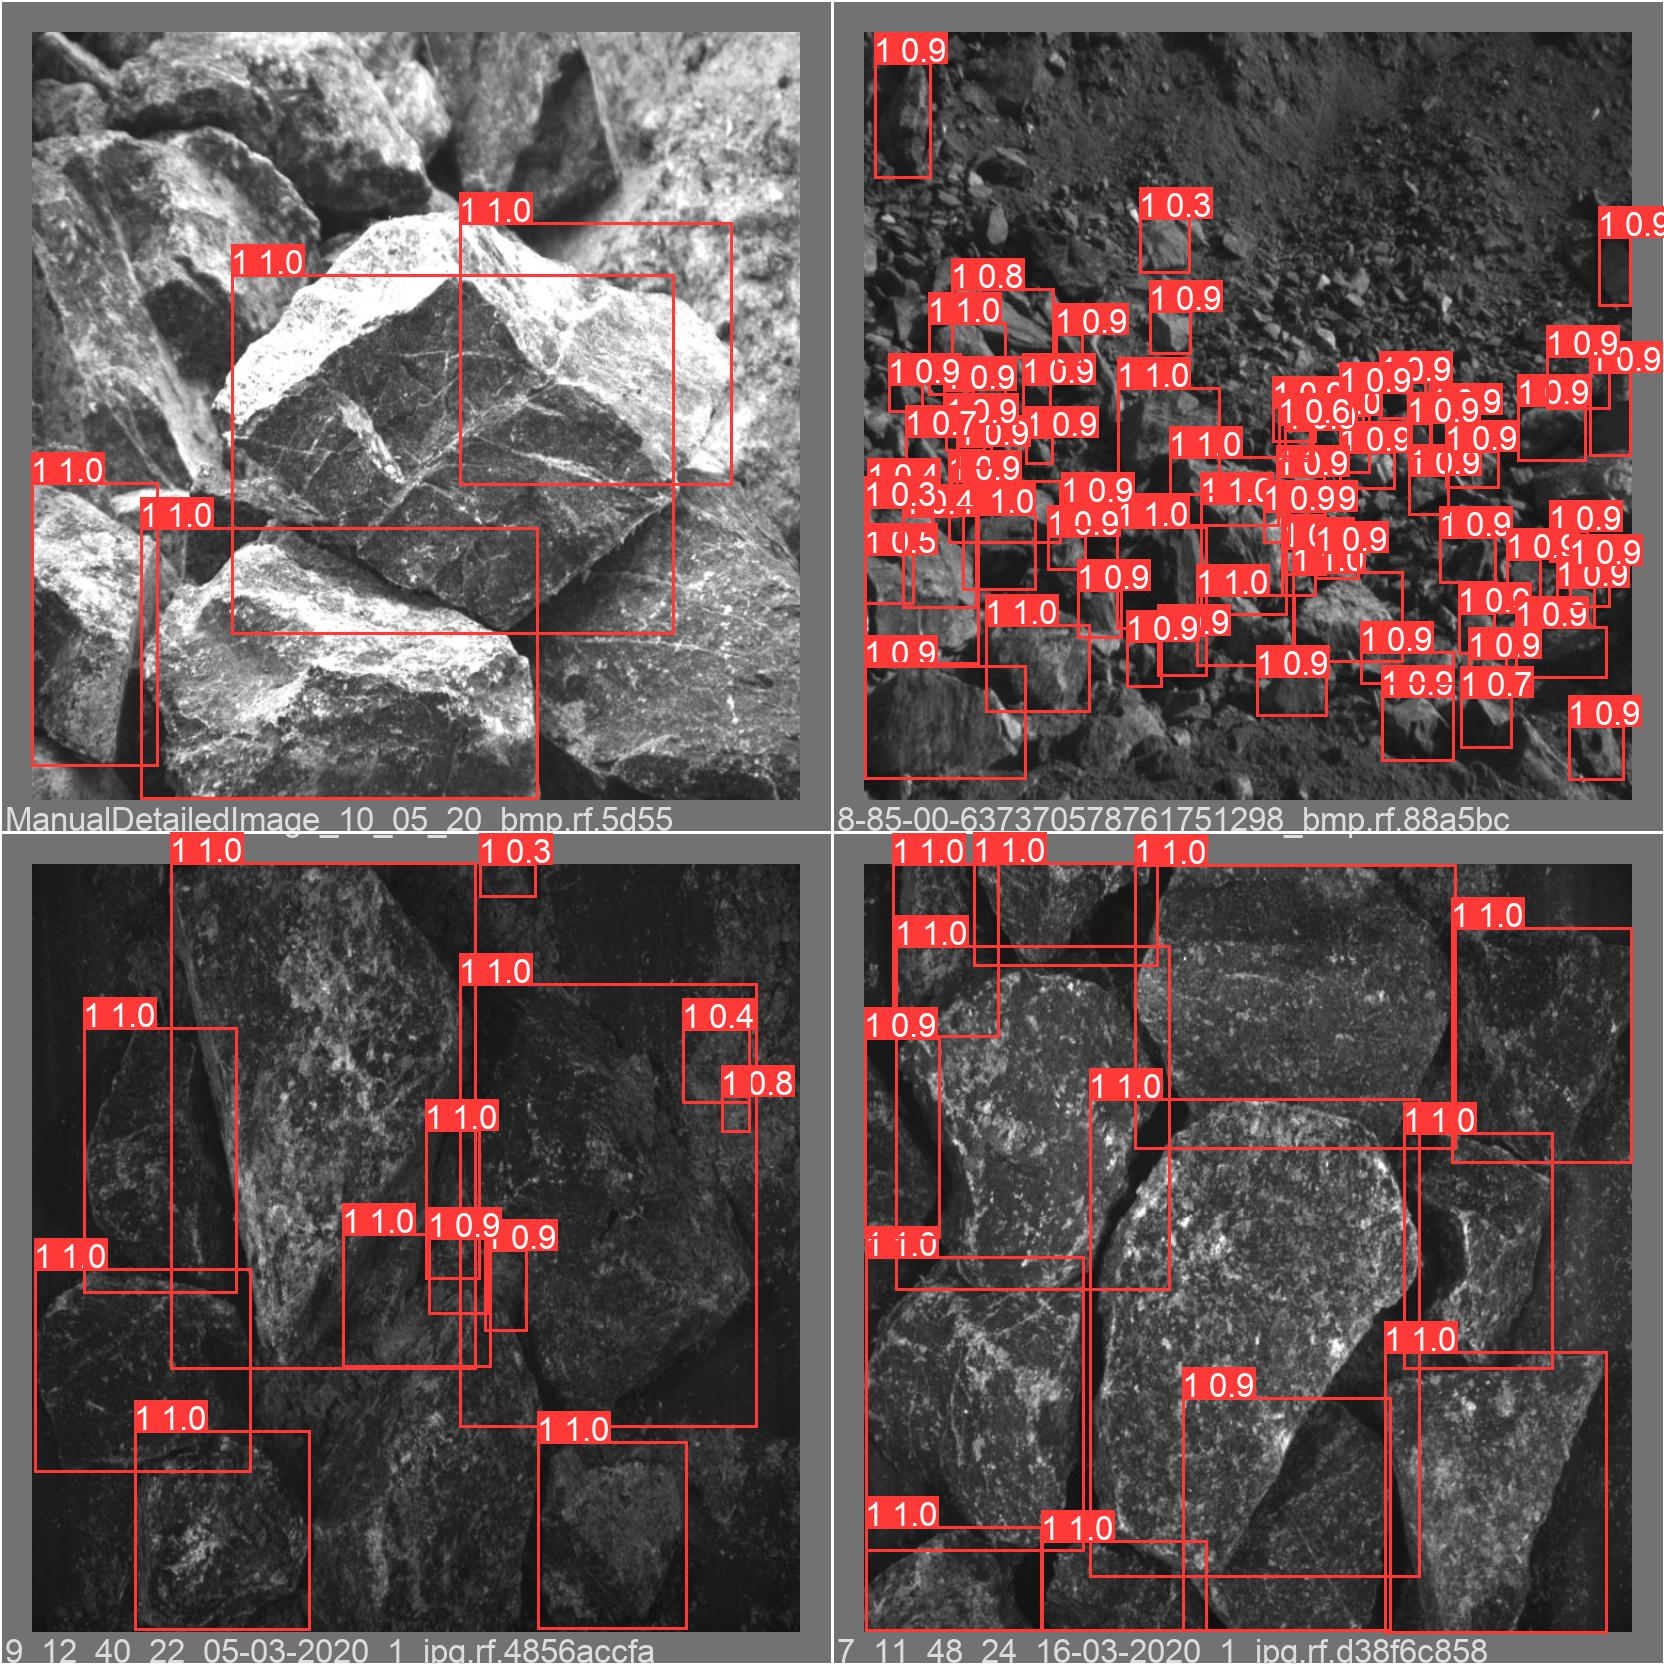

In [58]:
IPython.display.Image(filename='./runs/val/exp43/val_batch2_pred.jpg', width=920)

In [ ]:
IPython.display.Image(filename='./runs/val/exp44/val_batch2_pred.jpg', width=920)

In [64]:
from utils.plots import plot_results
plot_results('runs/train/open-pit-rock-chunks2/results.csv',)

In [63]:
!ls

CONTRIBUTING.md  hubconf.py			 setup.cfg
Dockerfile	 models				 train.py
LICENSE		 open-pit-rock-chunks-4		 tutorial.ipynb
README.md	 open-pit-rock-chunks-test-3	 utils
__pycache__	 open-pit-rock-fragments-2	 val.py
data		 open-pit-rock-fragments-test-1  yolov5m.pt
detect.py	 requirements.txt		 yolov5s.pt
export.py	 runs				 yolov5x6.pt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/yolov5/runs/detect/rock_x4 /content/drive/MyDrive/ 

## COCO Dataset validation



Во-первых, мы можем проверить, как YOLO будет работать с набором данных COCO. <br>
Для тестов COCO воспользуемся скриптом val.py.
<br> Скрипт можно вызвать со следующими аргументами: <ul>
<li><b>'--data'</b>, default=ROOT / 'data/coco128.yaml',  'путь к файлу вида dataset.yaml'
<li> <b> '--weights' </b>, nargs = '+', default = ROOT / 'yolov5s.pt', 'model.pt path (s)'
     <li> <b> '--batch-size' </b>, по умолчанию = 32, 'размер партии'
     <li> <b> '--imgsz', '--img', '--img-size' </b>,, по умолчанию = 640, 'размер вывода (в пикселях)'
     <li> <b> '--conf-thres' </b>, по умолчанию = 0,001, 'порог достоверности'
    <li> <b> '--iou-thres' </b>, по умолчанию = 0,6, 'Порог NMS IoU'
     <li> <b> '--task' </b>, default = 'val', 'train, val, test, speed or study'
     <li> <b> '--device' </b>, default = '', 'cuda device, т.е. 0 или 0,1,2,3 или cpu'
     <li> <b> '--single-cls' </b>, 'рассматривать как набор данных одного класса'
     <li> <b> '--augment' </b>, 'расширенный вывод'
     <li> <b> '--verbose' </b>, 'сообщить MAP по классам'
     <li> <b> '--save-txt' </b>, 'сохранять результаты в *.txt'
     <li> <b> '--save-hybrid' </b>, 'сохранить гибридные результаты метки + прогноза в * .txt'
     <li> <b> '--save-conf' </b>, 'сохранить достоверность в ярлыках --save-txt'
     <li> <b> '--save-json' </b>, 'сохранить файл результатов COCO-JSON'
     <li> <b> '--project' </b>, по умолчанию = ROOT/'run/ val', 'save to project / name'
     <li> <b> '--name' </b>, default = 'exp', 'сохранить в проект / имя'
     <li> <b> '--exist-ok' </b>, 'существующий проект / имя в порядке, без увеличения'
     <li> <b> '--half' </b>, 'использовать вывод половинной точности FP16'
     <li> <b> '--dnn' </b>, 'использовать OpenCV DNN для вывода ONNX'
</ul>


Для проверки мы будем использовать маленькую модель  `yolov5s.pt` 

*Примечание * <ul>

<li> <b> Результаты проверки </b> сохраняются в <code> 'run/val/' </code> с увеличивающимися номерами каталога выполнения, то есть <code> 'run/val/ exp2', 'run/val/exp3'</code> и т.д.

<li> Вместо использования полного набора данных COCO мы можем проверить результаты на уменьшенной копии этого набора <code> COCO128</code>.
    
<li> <b> Предварительно обученные модели </b> загружаются автоматически из последней версии репозитория YOLOv5, вы можете найти ее в `/yolo/models/'.
    
<li> <b> Наборы данных </b>, доступные для автоматической загрузки, включают: <code> COCO, COCO128, VOC, Argoverse, VisDrone, GlobalWheat, xView, Objects365, SKU-110K </code>.
    
<li> Вы можете найти всю доступную информацию о текущем состоянии Yolov5, используя страницу информации о  релизах <a href="https://github.com/ultralytics/yolov5/releases/">: 
    https://github.com/ultralytics/yolov5/Release/ </a>
    
<li> Также вы можете загрузить наборы данных <code> COCO </code> и <code> COCO128 </code> вручную. Например, для <code> COCO128 </code> вы можете использовать следующий код:

```python
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco128.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip
```
    

In [ ]:
!python val.py --weights 'yolov5s.pt' --data coco128.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco128.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-84-gdef7a0f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning '../datasets/coco128/labels/train2017.cache' images and labels... 128 found, 0 missing, 2 empty, 0 corrupted: 100% 128/128 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:49<00:00, 12.44s/it]
                 all        128        929      0.664      0.536      0.619      0.409
Speed: 5.1ms pre-process, 356.5ms inference, 9.2ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp8


Вы можете найти всю информацию о результатах обучения, проверки и обнаружения в каталоге `/yolov5/run/`. Например, мы можем увидеть, как  выглядят результаты для последнего батча

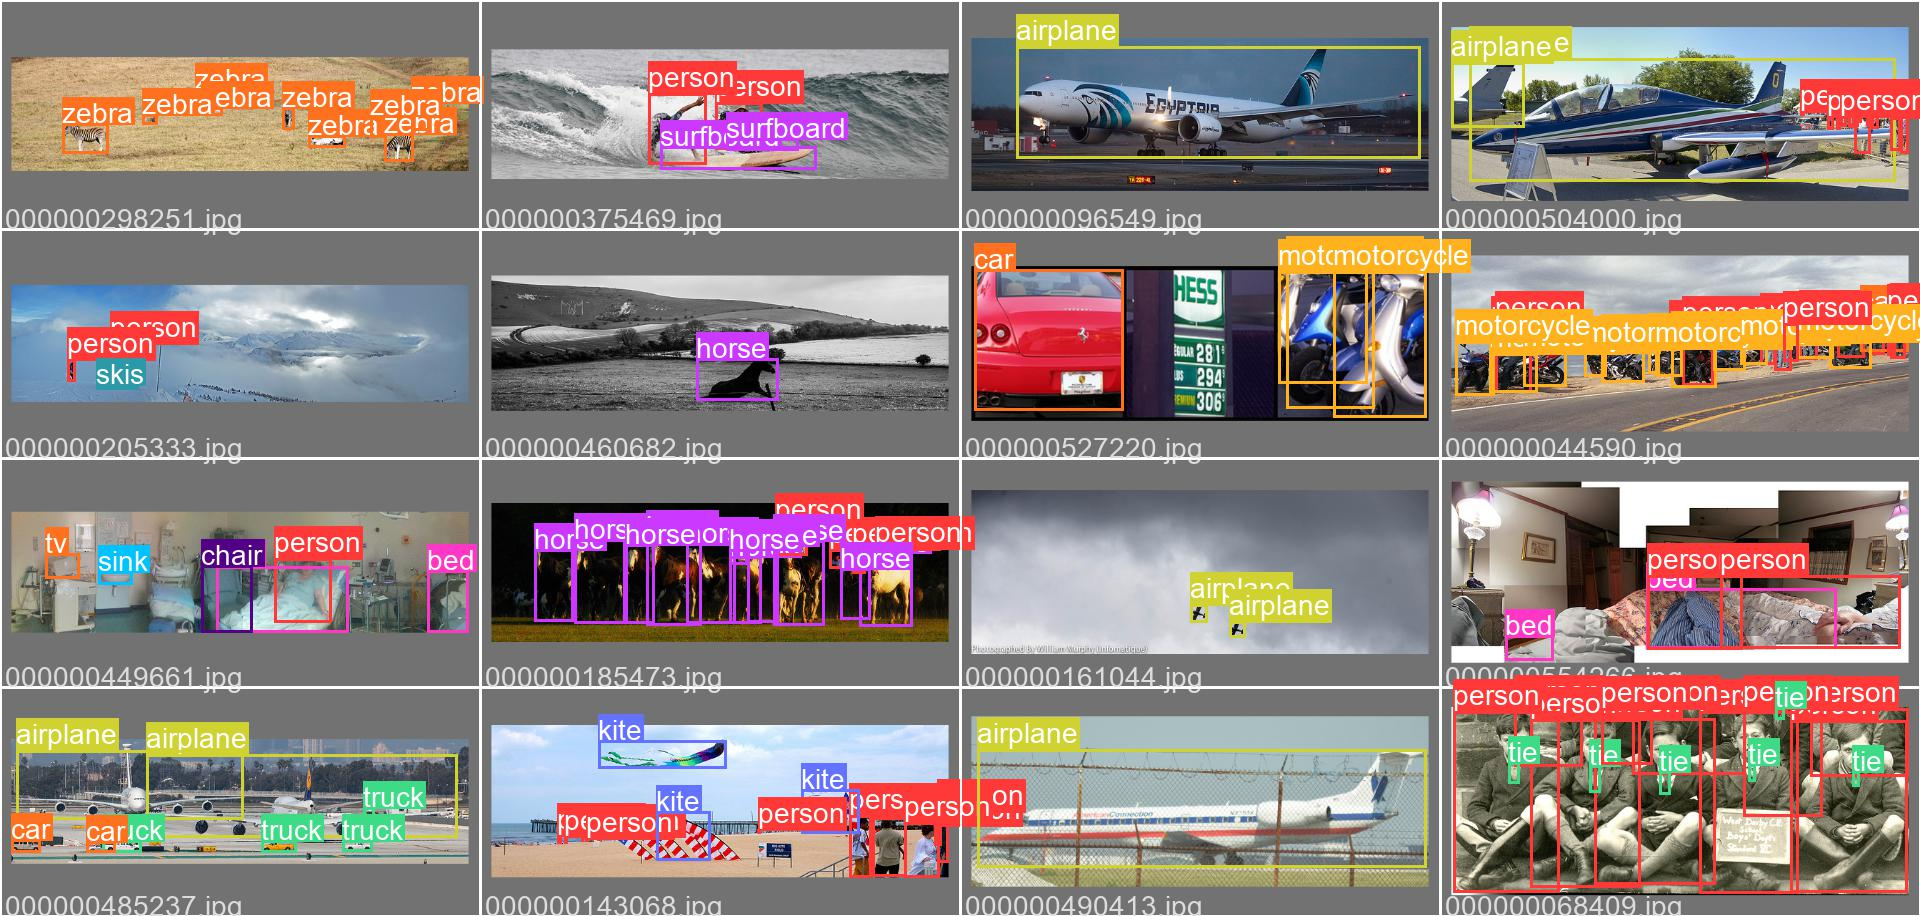

In [ ]:
display.Image(filename='/content/yolov5/runs/val/exp/val_batch0_labels.jpg', width=1024)

## Тренировка
Для обучения воспользуемся подготовленным скриптом `train.py`.
<ul>
<li> <b> путь начальных весов: </b> `--weights`, по умолчанию = ROOT/'yolov5s.pt'

<li> <b> путь к model.yaml для конфигурации: </b> `--cfg` default = ''

<li> <b> путь к dataset.yaml: </b> `--data`, по умолчанию = ROOT / 'data / coco128.yaml'

<li> <b> путь к конфигурации гиперпараметров: </b> `--hyp`, по умолчанию = ROOT / 'data / hyps / hyp.scratch.yaml'

<li> <b> количество эпох: </b> `--epochs`, по умолчанию = 300

<li> <b> общий размер пакета для всех графических процессоров: </b> `--batch-size` по умолчанию = 16, -1 для автоподбора

<li> <b> тренировка, размер изображения val (в пикселях): </b> `--imgsz`,` --img`, `--img-size`, по умолчанию = 640

<!-- <li> <b> прямоугольное обучение: </b> `--rect`, action = 'store_true' -->

<!-- <li> <b> возобновить последнее обучение: </b> `--resume`, nargs = '?', const = True, default = False -->

<!-- <li> <b> сохранить только последнюю контрольную точку: </b> `--nosave`, action = 'store_true' -->

<!-- <li> <b> проверять только последнюю эпоху: </b> `--noval`, action = 'store_true' -->

<!-- <li> <b> отключить автоматическую проверку привязки: </b> `--noautoanchor`, action = 'store_true' -->
  
<!-- <li> <b> развивать гиперпараметры для поколений x: </b> `--evolve`
 nargs = '?', const = 300, -->

<!-- <li> <b> сегмент gsutil: </b> `--bucket`, default = '' -->

<!-- <li> <b> кэшировать изображения в "ram" (по умолчанию) или "disk": </b> `--cache`, nargs = '?', const = 'ram'-->

<li> <b> использовать взвешенный выбор изображений для обучения: </b> `--image-weights`, action = 'store_true`

<!-- <li> <b> устройство cuda, т.е. 0 или 0,1,2,3 или cpu: </b> `--device`, default = '', -->

<!-- <li> <b> варьировать размер изображения +/- 50%: </b> `--multi-scale`, action = 'store_true' -->

<li> <b> обучать данные с несколькими классами как с одним классом: </b> `--single-cls`, action = 'store_true'

<!-- <li> <b> использовать оптимизатор torch.optim.Adam (): </b> `--adam`, action = 'store_true' -->

<!-- <li> <b> использовать SyncBatchNorm, доступно только в режиме DDP: </b> `--sync-bn`, action = 'store_true' -->
    
<!-- <li> <b> максимальное количество рабочих загрузчиков данных: </b> `--workers`, по умолчанию = 8 -->

<li> <b> сохранить в проект/имя: </b> `--project`, по умолчанию = ROOT/'run/train'

<li> <b> сохранить в проект/имя: </b> `--name`, default = 'exp'

<!-- <li> <b> существующий проект / имя в порядке, без увеличения: </b> `--exist-ok`, action = 'store_true' -->

<!-- <li> <b> четырехъядерный загрузчик данных: </b> `--quad`, action = 'store_true' -->

<!-- <li> <b> линейный LR: </b> `--linear-lr`, action = 'store_true' -->

<!-- <li> <b> Эпсилон сглаживания меток: </b> `--label-smoothing`, по умолчанию = 0,0 -->

<!-- <li> <b> EarlyStopping терпение (эпохи без улучшений): </b> `--patience`, default = 100 -->

<li> <b> Количество слоев для закрепления. backbone = 10, all = 24: </b> `--freeze`, по умолчанию = 0

<li> <b> Сохранять контрольную точку каждые x эпох (отключено, если <1): </b> `--save-period`, по умолчанию = -1

<!-- <li> <b> Параметр DDP, не изменять: </b> `--local_rank`, default = -1 -->

<!-- <li> <b> W&B (аргументы веса и смещения) Entity: </b> `--entity`, по умолчанию = None
<!-- 
<li> <b> W&B: загрузить набор данных как таблицу артефактов: </b> `--upload_dataset`, action = 'store_true' -->

<!-- <li> <b> W&B: установить интервал регистрации изображения ограничивающего прямоугольника: </b> `--bbox_interval`, по умолчанию = -1 -->

<!-- <li> <b> W&B: версия артефакта набора данных для использования: </b> `--artifact_alias`, default = 'latest' -> -->

* Примечание * <br> Вы можете найти остальные параметры в `train.py` в форме, подобном: <br>```parser.add_argument ('- freeze', default = 0, 'Number of Layers to freeze . backbone = 10, all = 24 ') ```


Например, мы обучим модель YOLOv5s на наборе данных COCO128 с помощью `--data` `coco128.yaml`,  с предобученными весами  `--weights yolov5s.pt` со спецификацией, определенной в файле `--cfg 'yolov5s.yaml`.

<em> Примечание </em> <ul>
<li> <b> Результаты обучения </b> сохраняются в <code> 'run/train/' </code> с увеличением номера каталогов, например, <code> 'run/train/exp2', 'run/train/exp3'</code> и т. д.

In [ ]:
# # Tensorboard  (optional)
# %load_ext tensorboard
# %tensorboard --logdir runs/train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

python3: can't open file 'train.py': [Errno 2] No such file or directory


### Упражнение 1.
1. Проверьте производительность(точность) дообученной модели на наборе валидационных данных.
2. Найдите и проверьте графические результаты обучения (`results.png`).
3. Проверьте производительность модели Yolov5 nano для набора данных `COCO128`, сравните метрику `mAP @ .5` для модели small и nano
4. Попробуйте обучить модель yolo nano с нуля (без предобченных весов) с минимум 100 эпохами обучения для задачи `COCO128`.
5. Проверьте производительность обученной модели на валидационных данных.
<!-- 6. Try to train the nano model with the  -->

### Упражнение 2.
1. Попробуйте обучить модель YOLO small (предобученную) с помощью следующего пользовательского набора данных.
```python
! wget https://raw.githubusercontent.com/shitkov/signature_detector/main/dataset.zip
! распаковать dataset.zip
display.clear_output ()
```
Используйте размер изображения 640, размер батчв 16, количество эпох 100.
*Примечание* данные в обучении должны быть указаны как файл `.yaml`, например `'/content/yolov5/dataset/sig.yaml'`
2. Проверьте результаты в для валидационных данных.

### Упражнение 3. Продвинутый уровень (не обязательное).
1. Изучите, как обучить YOLO на пользовательских данных, используя, например,
* это руководство https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics
* или этот блокнот https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb
* или это неофициальное руководство https://wandb.ai/onlineinference/YOLO/reports/YOLOv5-Object-Detection-on-Windows-Step-By-Step-Tutorial---VmlldzoxMDQwNzk4
* или этот блокнот https://colab.research.google.com/drive/1gDZ2xcTOgR39tGGs-EZ6i3RTs16wmzZQ#scrollTo=SDIhrBF0sPaM

2. Также ознакомьтесь с официальной вики-страницей YOLO https://github.com/ultralytics/yolov5/wiki.

In [60]:
### detect

In [69]:
!python detect.py --weights runs/train/open_pit_set-14/weights/last.pt --img 720 --source ../image_files/test/Detailed --save-txt

detect: weights=['runs/train/open_pit_set-14/weights/last.pt'], source=../image_files/test/Detailed, data=data/coco128.yaml, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.7.1 CUDA:0 (GeForce GTX 1070, 8112MiB)

Fusing layers... 
Model Summary: 574 layers, 139970872 parameters, 0 gradients, 208.1 GFLOPs
image 1/64 /home/office/kirilman/Projects/asbestos/src/notebooks/image_files/test/Detailed/20-04-2021-15-30-50_1_3_80_detailed.bmp: 640x768 1 1, Done. (0.075s)
image 2/64 /home/office/kirilman/Projects/asbestos/src/notebooks/image_files/test/Detailed/20-04-2021-15-31-07_2_3_60_detailed.bmp: 640x768 Done. (0.070s)
image 3/64 /home/office/kirilman/Pro

In [81]:
!pwd

/home/office/kirilman/Projects/asbestos/src/notebooks/yolov5


In [117]:
import glob
from pathlib import Path
p = Path("/home/office/kirilman/Projects/asbestos/src/notebooks/image_files/")
f = glob.glob(str(p / '**' / '*.*'), recursive=True)
f[-1]
len(f)

140

In [115]:
str(p / '**' / '*.*')

'/home/office/kirilman/Projects/asbestos/src/notebooks/image_files/bboxs_v5/**/*.*'

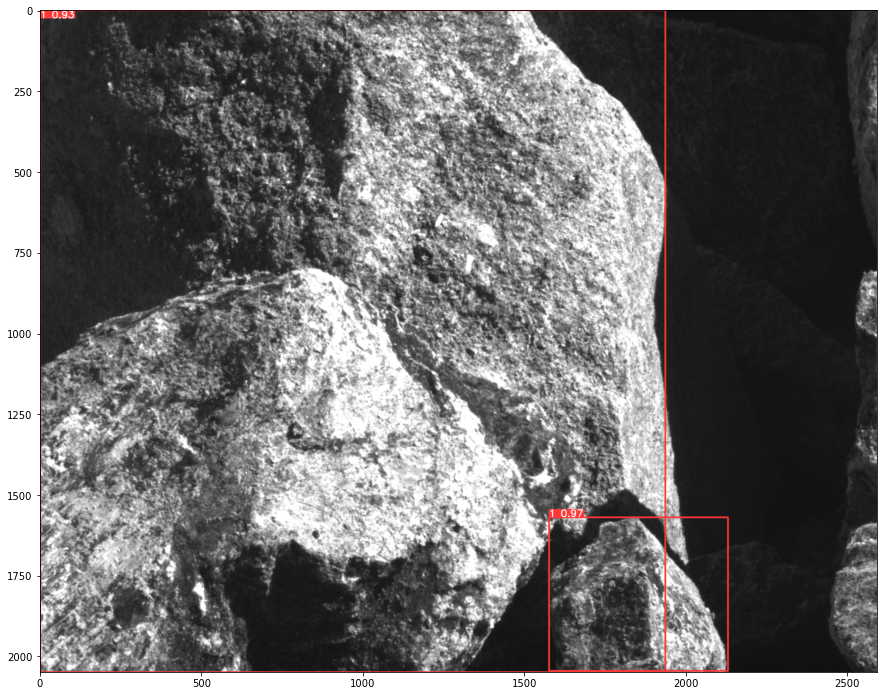

In [98]:

files = os.listdir('./runs/detect/exp4/')
img = Image.open('./runs/detect/exp4/' + files[42])
fig = plt.figure(figsize = (15,15))
plt.imshow(img)